<a href="https://colab.research.google.com/github/yuki-tamaribuchi/kaggle_codes/blob/master/kaggle_titanic_logistic_reg_log_trans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir /root/.kaggle
!cp drive/MyDrive/kaggle/kaggle.json /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle competitions download -c titanic

train.csv: Skipping, found more recently modified local copy (use --force to force download)
gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df['Age']=train_df['Age'].fillna(train_df['Age'].mean())
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

sex_dummies=pd.get_dummies(train_df['Sex'],prefix='Sex')
pclass_dumies=pd.get_dummies(train_df['Pclass'],prefix='Pclass')
embarked_dummies=pd.get_dummies(train_df['Embarked'],prefix='Embarked')

train_df=pd.concat([train_df,sex_dummies,pclass_dumies,embarked_dummies],axis=1)

drop_col_names=['PassengerId','Name','Cabin','Ticket','Sex','Pclass','Pclass_1','Sex_male','Embarked','Embarked_C']
train_df=train_df.drop(drop_col_names,axis=1)

train_df['Age']=(train_df['Age']+1).transform(np.log)
train_df['Fare']=(train_df['Fare']+1).transform(np.log)
train_df['Parch']=(train_df['Parch']+1).transform(np.log)
train_df['SibSp']=(train_df['SibSp']+1).transform(np.log)

In [7]:
train_df

,Survived,Age,SibSp,Parch,Fare,Sex_female,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,3.135494,0.693147,0.000000,2.110213,0,0,1,0,1
1,1,3.663562,0.693147,0.000000,4.280593,1,0,0,0,0
2,1,3.295837,0.000000,0.000000,2.188856,1,0,1,0,1
3,1,3.583519,0.693147,0.000000,3.990834,1,0,0,0,1
4,0,3.583519,0.000000,0.000000,2.202765,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,3.332205,0.000000,0.000000,2.639057,0,1,0,0,1
887,1,2.995732,0.000000,0.000000,3.433987,1,0,0,0,1
888,0,3.424234,0.693147,1.098612,3.196630,1,0,1,0,1
889,1,3.295837,0.000000,0.000000,3.433987,0,0,0,0,0


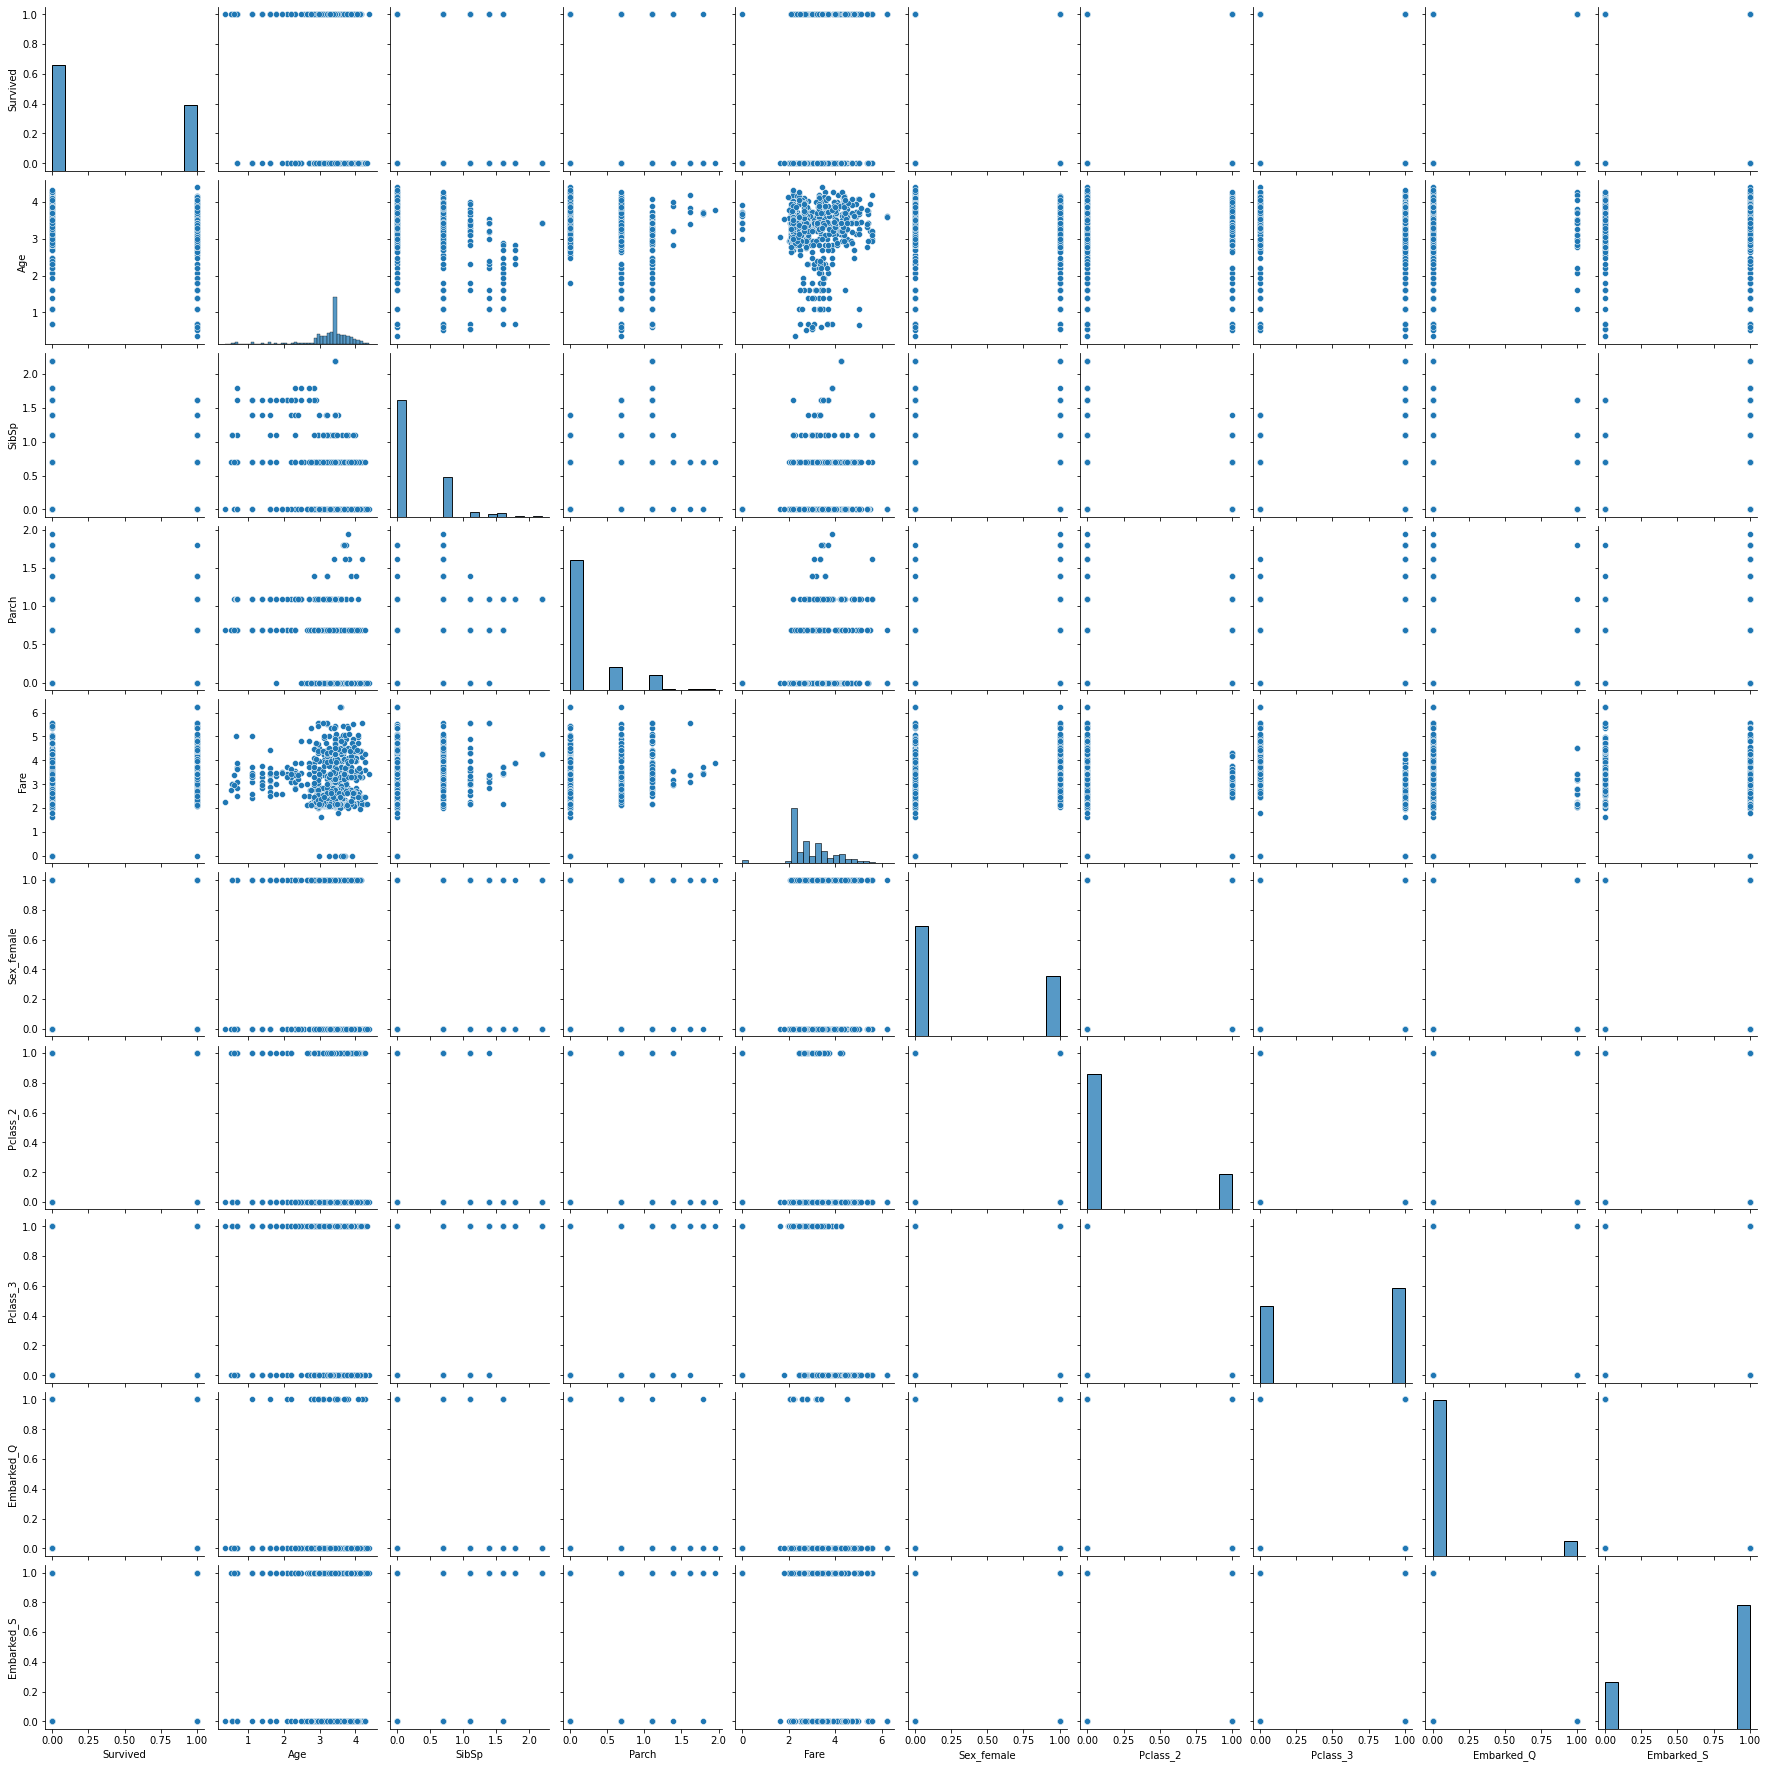

In [8]:
sns.pairplot(train_df)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(train_df.drop(['Survived'],axis=1),train_df['Survived'],random_state=0)

In [10]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [11]:
clf=LogisticRegression()
clf.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
clf.score(scaled_X_test,y_test)

0.8071748878923767